## Name

- Name = Suma Bimantoro Andru
- Job = Data Science
- Objective = NLP, Clasification Category

## Import Libraries

In [24]:
!pip install contractions

In [25]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

import re
import string
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.layers import TextVectorization, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout
from tensorflow.keras.models import Model, Sequential

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sumaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sumaa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data Loading

In [26]:
df = pd.read_json('data.json')

In [27]:
df

,content_id,category,headline,authors,link,short_description,date
0,1,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,2,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,3,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,4,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,5,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...,...
96,97,POLITICS,Senate Advances Court Pick Who Said Planned Pa...,Jennifer Bendery,https://www.huffingtonpost.com/entry/wendy-vit...,Every Republican on the judiciary committee vo...,2018-05-24
97,98,POLITICS,Rudy Giuliani: Trump Won't Interview With Muel...,S.V. Date,https://www.huffingtonpost.com/entry/trump-giu...,The canceled North Korea summit doesn’t mean t...,2018-05-24
98,99,POLITICS,Kentucky Attorney Running For Judge Dies 1 Day...,Nina Golgowski,https://www.huffingtonpost.com/entry/judge-can...,"Danny Alvarez, a married of father of three, w...",2018-05-24
99,100,POLITICS,Chrissy Teigen Taunts Donald Trump Over Twitte...,Lee Moran,https://www.huffingtonpost.com/entry/chrissy-t...,"Other tweeters, including Mexico's former pres...",2018-05-24


In [28]:
# Check dataset -1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   content_id         101 non-null    int64         
 1   category           101 non-null    object        
 2   headline           101 non-null    object        
 3   authors            101 non-null    object        
 4   link               101 non-null    object        
 5   short_description  101 non-null    object        
 6   date               101 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.6+ KB


In [29]:
# Check dataset -2
df.describe()

,content_id
count,101.000000
mean,51.000000
std,29.300171
min,1.000000
25%,26.000000
50%,51.000000
75%,76.000000
max,101.000000


## EDA (Exploratory Data Analysis)

1      1
65     1
75     1
74     1
73     1
      ..
32     1
31     1
30     1
29     1
101    1
Name: content_id, Length: 101, dtype: int64



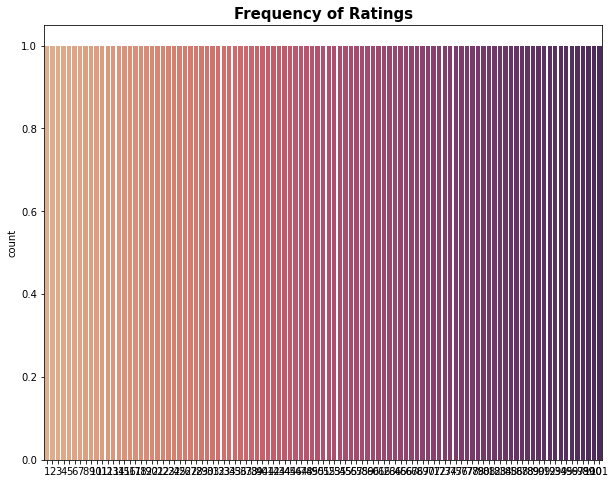

In [30]:

# See the frequency of ratings

print(df['content_id'].value_counts())
print('')

figure(figsize=(10, 8))
sns.countplot(data=df, x='content_id', palette='flare').set_title('Rating Distribution Across Dataset')
plt.title('Frequency of Ratings', weight='bold', fontsize=15)
plt.xlabel('')
plt.show()

In [31]:
# Length of word in sentence

df['Length_headline'] = df['headline'].apply(len)
df['Length_authors'] = df['authors'].apply(len)
df['Length_link'] = df['link'].apply(len)
df['Length_short_description'] = df['short_description'].apply(len)
df.head()

,content_id,category,headline,authors,link,short_description,date,Length_headline,Length_authors,Length_link,Length_short_description
0,1,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,64,15,99,76
1,2,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,75,13,138,24
2,3,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,47,10,83,87
3,4,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,69,10,97,86
4,5,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,71,10,98,87


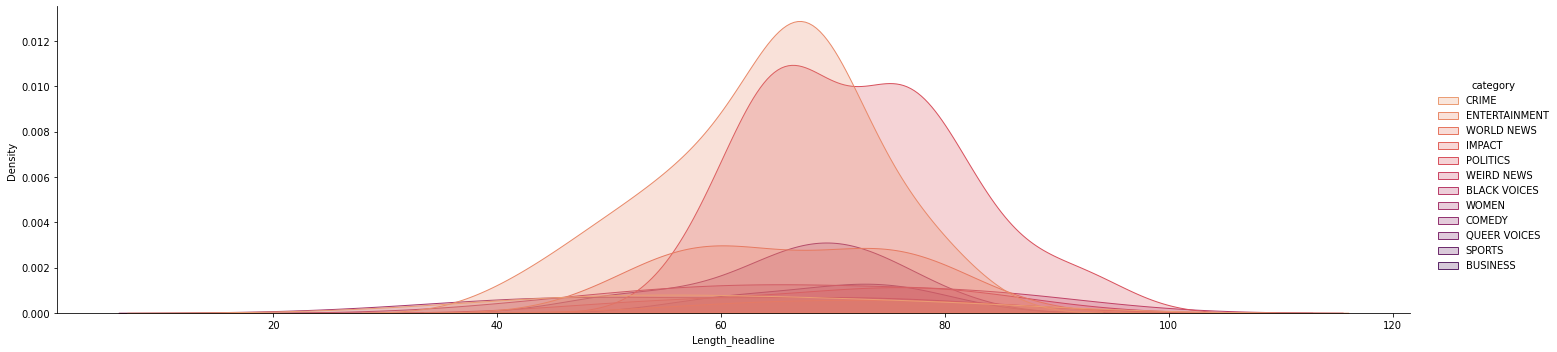

In [32]:
sns.displot(data=df, x='Length_headline', hue='category', palette='flare', kind='kde', fill=True, aspect=4)

ENTERTAINMENT    30
POLITICS         29
WORLD NEWS       10
COMEDY            7
BLACK VOICES      6
CRIME             4
WEIRD NEWS        4
WOMEN             4
QUEER VOICES      3
IMPACT            2
SPORTS            1
BUSINESS          1
Name: category, dtype: int64



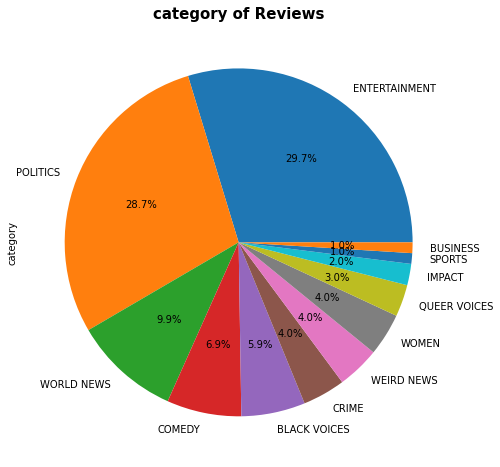

In [33]:
# See value counts of Rating

print(df['category'].value_counts())
print('')

df.category.value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('category of Reviews', weight='bold', fontsize=15)
plt.show()

## Data Preprocessing

### Create Data Inference

In [34]:
# Get Data for Model Inference
df_inf1 = df.sample(10, random_state=7)
df_inf1

,content_id,category,headline,authors,link,short_description,date,Length_headline,Length_authors,Length_link,Length_short_description
37,38,COMEDY,Trump's New 'MAGA'-Themed Swimwear Sinks On Tw...,Ed Mazza,https://www.huffingtonpost.com/entry/trump-mag...,"""Does this swimsuit make me look racist?""",2018-05-25,51,8,85,41
26,27,WORLD NEWS,Irish Voters Set To Liberalize Abortion Laws I...,,https://www.huffingtonpost.com/entry/ireland-a...,Vote counting will begin Saturday.,2018-05-25,76,0,96,34
78,79,COMEDY,'Late Night' Writer's Breathless Royal Wedding...,Lee Moran,https://www.huffingtonpost.com/entry/royal-wed...,"“Then he bites his lip, like, ‘Hmm, girl.’”",2018-05-24,77,9,114,43
94,95,POLITICS,Ireland's Historic Vote On Legalizing Abortion...,Laura Bassett,https://www.huffingtonpost.com/entry/irelands-...,American influence could tip the referendum.,2018-05-24,77,13,117,44
49,50,ENTERTAINMENT,Pete Davidson Says His Mental Illness Doesn't ...,Ron Dicker,https://www.huffingtonpost.com/entry/pete-davi...,"The ""SNL"" star reacted to criticism that he sh...",2018-05-25,58,10,100,120
15,16,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26,67,14,97,75
93,94,POLITICS,Immigrant Children Accuse Border Patrol Of Abu...,Willa Frej,https://www.huffingtonpost.com/entry/immigrant...,One 16-year-old filed a complaint alleging tha...,2018-05-24,74,10,103,138
71,72,QUEER VOICES,How 'RuPaul’s Drag Race' Is Teaching Straight ...,"INTO, Editorial Partner",https://www.huffingtonpost.com/entry/how-rupau...,Mainstream pop culture isn’t the only thing to...,2018-05-25,72,23,114,104
86,87,COMEDY,Seth Meyers Gives Donald Trump Some Valuable M...,Lee Moran,https://www.huffingtonpost.com/entry/seth-meye...,"“Stop trying to make ‘Fetch’ happen.""",2018-05-24,61,9,104,37
22,23,WEIRD NEWS,Mystery 'Wolf-Like' Animal Reportedly Shot In ...,Hilary Hanson,https://www.huffingtonpost.com/entry/montana-w...,“We have no idea what this was until we get a ...,2018-05-26,81,13,97,63


In [35]:
# Remove inference set from Dataset
df_train_test = df.drop(df_inf1.index)
df_train_test

,content_id,category,headline,authors,link,short_description,date,Length_headline,Length_authors,Length_link,Length_short_description
0,1,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,64,15,99,76
1,2,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,75,13,138,24
2,3,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,47,10,83,87
3,4,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,69,10,97,86
4,5,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,71,10,98,87
...,...,...,...,...,...,...,...,...,...,...,...
96,97,POLITICS,Senate Advances Court Pick Who Said Planned Pa...,Jennifer Bendery,https://www.huffingtonpost.com/entry/wendy-vit...,Every Republican on the judiciary committee vo...,2018-05-24,90,16,98,67
97,98,POLITICS,Rudy Giuliani: Trump Won't Interview With Muel...,S.V. Date,https://www.huffingtonpost.com/entry/trump-giu...,The canceled North Korea summit doesn’t mean t...,2018-05-24,79,9,99,111
98,99,POLITICS,Kentucky Attorney Running For Judge Dies 1 Day...,Nina Golgowski,https://www.huffingtonpost.com/entry/judge-can...,"Danny Alvarez, a married of father of three, w...",2018-05-24,64,14,99,111
99,100,POLITICS,Chrissy Teigen Taunts Donald Trump Over Twitte...,Lee Moran,https://www.huffingtonpost.com/entry/chrissy-t...,"Other tweeters, including Mexico's former pres...",2018-05-24,63,9,108,103


In [40]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf1.reset_index(drop=True, inplace=True)
df_inf1

,content_id,category,headline,authors,link,short_description,date,Length_headline,Length_authors,Length_link,Length_short_description
0,38,COMEDY,Trump's New 'MAGA'-Themed Swimwear Sinks On Tw...,Ed Mazza,https://www.huffingtonpost.com/entry/trump-mag...,"""Does this swimsuit make me look racist?""",2018-05-25,51,8,85,41
1,27,WORLD NEWS,Irish Voters Set To Liberalize Abortion Laws I...,,https://www.huffingtonpost.com/entry/ireland-a...,Vote counting will begin Saturday.,2018-05-25,76,0,96,34
2,79,COMEDY,'Late Night' Writer's Breathless Royal Wedding...,Lee Moran,https://www.huffingtonpost.com/entry/royal-wed...,"“Then he bites his lip, like, ‘Hmm, girl.’”",2018-05-24,77,9,114,43
3,95,POLITICS,Ireland's Historic Vote On Legalizing Abortion...,Laura Bassett,https://www.huffingtonpost.com/entry/irelands-...,American influence could tip the referendum.,2018-05-24,77,13,117,44
4,50,ENTERTAINMENT,Pete Davidson Says His Mental Illness Doesn't ...,Ron Dicker,https://www.huffingtonpost.com/entry/pete-davi...,"The ""SNL"" star reacted to criticism that he sh...",2018-05-25,58,10,100,120
5,16,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26,67,14,97,75
6,94,POLITICS,Immigrant Children Accuse Border Patrol Of Abu...,Willa Frej,https://www.huffingtonpost.com/entry/immigrant...,One 16-year-old filed a complaint alleging tha...,2018-05-24,74,10,103,138
7,72,QUEER VOICES,How 'RuPaul’s Drag Race' Is Teaching Straight ...,"INTO, Editorial Partner",https://www.huffingtonpost.com/entry/how-rupau...,Mainstream pop culture isn’t the only thing to...,2018-05-25,72,23,114,104
8,87,COMEDY,Seth Meyers Gives Donald Trump Some Valuable M...,Lee Moran,https://www.huffingtonpost.com/entry/seth-meye...,"“Stop trying to make ‘Fetch’ happen.""",2018-05-24,61,9,104,37
9,23,WEIRD NEWS,Mystery 'Wolf-Like' Animal Reportedly Shot In ...,Hilary Hanson,https://www.huffingtonpost.com/entry/montana-w...,“We have no idea what this was until we get a ...,2018-05-26,81,13,97,63


### Preprocessing Corpus

Beberapa tahapan preprocessing yang dilakukan pada text yaitu:
- Membuat semua teks menjadi lowercase
- Menghilangkan teks dalam bracket
- Memperbaiki contractions. contractions adalah jenis kata unik yang menggabungkan dua atau lebih kata lain dalam bentuk yang dipersingkat, biasanya dengan apostrof. contoh : he's atau I'm menjadi he is atau i am
- Menghilangkan tanda baca
- Menghilangkan angka
- Menghilangkan huruf non-latin
- Menghilangkan non-words
- Menghilangkan whitespace
- Menghilangkan stopwords
- Lemmatization

In [37]:
# Make a function of text preprocessing

def clean_rev(rev):

    # make text lowercase
    rev = rev.lower()

    # remove text in bracket
    rev = re.sub('', '', rev)

    # fix contractions
    rev = contractions.fix(rev)

    # remove punctuation
    rev = re.sub('[%s]' % re.escape(string.punctuation), '', rev)

    # remove words containing numbers
    rev = re.sub('\w*\d\w*', '', rev)

    # remove non-latin words
    rev = re.sub('[^\x00-\x7f]', '', rev)

    # remove non-words (emoji, etc.)
    rev = re.sub("[^A-Za-z\s']", " ", rev)

    # remove underscores
    rev =  str.replace(rev, '_', '')

    # remove whitespace
    rev = rev.strip()

    # Tokenization
    tokens = word_tokenize(rev)

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    rev = [word for word in tokens if word not in stop_words]
                   
    # Lemmatize the word
    sentence = []
    for word in rev:
      lm = WordNetLemmatizer()
      sentence.append(lm.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [44]:
# Apply function to dataFrame
df_train_test['headlineCleaned'] = df_train_test['headline'].apply(lambda x: clean_rev(x))
df_train_test['authorsCleaned'] = df_train_test['authors'].apply(lambda x: clean_rev(x))
df_train_test['linkCleaned'] = df_train_test['link'].apply(lambda x: clean_rev(x))
df_train_test['short_descriptionCleaned'] = df_train_test['short_description'].apply(lambda x: clean_rev(x))



In [45]:
df_train_test['headlineCleaned']

0                         mass shoot texas last week tv
1     smith join diplo nicky jam world cup official ...
2                       hugh grant marry first time age
3     jim carrey blast castrato adam schiff democrat...
4     julianna margulies use donald trump poop bag p...
                            ...                        
86    senate advance court pick say plan parenthood ...
87    rudy giuliani trump not interview mueller get ...
88      kentucky attorney run judge die day primary win
89    chrissy teigen taunt donald trump twitter bloc...
90       koch network go one trump favorite congressmen
Name: headlineCleaned, Length: 91, dtype: object

In [46]:
df_train_test['authorsCleaned']

0      melissa jeltsen
1        andy mcdonald
2           ron dicker
3           ron dicker
4           ron dicker
            ...       
86    jennifer bendery
87             sv date
88      nina golgowski
89           lee moran
90     kevin robillard
Name: authorsCleaned, Length: 91, dtype: object

In [47]:
df_train_test['linkCleaned']

0      
1      
2      
3      
4      
     ..
86     
87     
88     
89     
90     
Name: linkCleaned, Length: 91, dtype: object

In [48]:
df_train_test['short_descriptionCleaned']

0       leave husband kill children another day america
1                                           course song
2     actor longtime girlfriend anna eberstein tie k...
3     actor give dems asskicking not fight hard enou...
4     dietland actress say use bag really cathartic ...
                            ...                        
86    every republican judiciary committee vote wend...
87    cancel north korea summit not mean president t...
88    danny alvarez marry father three vie jefferson...
89    tweeters include mexicos former president vice...
90    billionaire koch brothers political network wa...
Name: short_descriptionCleaned, Length: 91, dtype: object

In [49]:
df_train_test.head(3)

,content_id,category,headline,authors,link,short_description,date,Length_headline,Length_authors,Length_link,Length_short_description,headlineCleaned,authorsCleaned,linkCleaned,short_descriptionCleaned
0,1,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,64,15,99,76,mass shoot texas last week tv,melissa jeltsen,,leave husband kill children another day america
1,2,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,75,13,138,24,smith join diplo nicky jam world cup official ...,andy mcdonald,,course song
2,3,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,47,10,83,87,hugh grant marry first time age,ron dicker,,actor longtime girlfriend anna eberstein tie k...


In [50]:
# See the difference before and after preprocessing

print('Document 10: ' , df_train_test.headline[10])
print(' ')
print('Preprocessed Document 10: ' , df_train_test.headlineCleaned[10])

Document 10:  Justin Timberlake Visits Texas School Shooting Victims
 
Preprocessed Document 10:  justin timberlake visit texas school shoot victims


## Splitting Betwen X and Y

In [122]:
# Splitting X and y
X = df_train_test['headlineCleaned']
y = df_train_test['category']

## Splitting between Train Set, Validation Set, and Test Set

In [123]:
# split train-set, val-set, and test-set
X_train_val, X_test, y_train_val, y_test = train_test_split (X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split (X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
print('Val Size : ', X_val.shape)

Train Size :  (65,)
Test Size :  (14,)
Val Size :  (12,)


## Label Encoding

In [124]:
# Encoding target

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

print(le.classes_)

['BLACK VOICES' 'BUSINESS' 'COMEDY' 'CRIME' 'ENTERTAINMENT' 'IMPACT'
 'POLITICS' 'QUEER VOICES' 'SPORTS' 'WEIRD NEWS' 'WOMEN' 'WORLD NEWS']


## Tokenization

In [125]:
# Get Vocabularies

cv = CountVectorizer()
X_train_vec = cv.fit_transform(X_train)
X_val_vec = cv.transform(X_val)
X_test_vec = cv.transform(X_test)

X_train_vec

<65x417 sparse matrix of type '<class 'numpy.int64'>'
	with 524 stored elements in Compressed Sparse Row format>

In [126]:
# Get number of Vocab and maximum document length

vocabs = len(cv.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah Vocab : ", vocabs)
print("Max Length dari Dokumen : ", max_sen_len, "words")

Jumlah Vocab :  417
Max Length dari Dokumen :  12 words


In [127]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=vocabs,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))

text_vectorization.adapt(X_train)

## Word Embedding

In [128]:
# Embedding

embedding = Embedding(input_dim=vocabs,
                      output_dim=64,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

## Word Cloud

In [129]:
# See Top 10 Token

text_vectorization.get_vocabulary()[:10]

['',
 '[UNK]',
 'trump',
 'new',
 'north',
 'summit',
 'not',
 'korea',
 'report',
 'get']

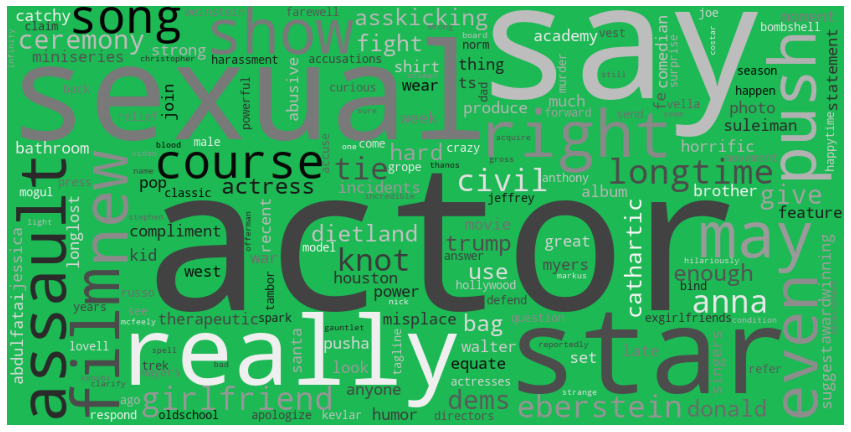

In [130]:
# Wordcloud for good reviews
goodrev = df_train_test[df_train_test['category'] == 'ENTERTAINMENT']['short_descriptionCleaned']

plt.figure(figsize=(15,15))
wordcloudgood = WordCloud(max_words=1000, min_font_size=10, height=500, width=1000, background_color='#1db954', colormap='gist_yarg', collocations=False).generate(' '.join(goodrev))

plt.axis('off')
plt.imshow(wordcloudgood)

In [131]:
# See top 10 words
ENTERTAINMENT = pd.DataFrame(wordcloudgood.process_text(''.join(goodrev)).items()).sort_values(1, ascending=False)
    
for i in range(10):
  item = ENTERTAINMENT.iloc[i]
  print(item[0] + ' \t= ' + str(item[1]))

actor 	= 3
sexual 	= 3
say 	= 3
may 	= 2
push 	= 2
film 	= 2
star 	= 2
assault 	= 2
show 	= 2
even 	= 2


## Model Definition

In [132]:
# Creating the Model

#Optimizer
optimizer = Adam(lr=0.0001)

model = Sequential()

model.add(text_vectorization)
model.add(embedding)
model.add(Dropout(0.50))

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(15)))
model.add(Dropout(0.50))
model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.50))
model.add(Dense(1, activation='softmax'))

# compile
model.compile(loss='binary_crossentropy', 
                         optimizer=optimizer,
                         metrics= 'accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 12)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 12, 64)            26688     
                                                                 
 dropout_6 (Dropout)         (None, 12, 64)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 30)               9600      
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 15)               

In [133]:
!pip install pydot

In [134]:
# plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Model Training

In [135]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
2/2 [==============================] - 9s 2s/step - loss: 0.6830 - accuracy: 0.0154 - val_loss: 0.6754 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 72ms/step - loss: 0.7144 - accuracy: 0.0154 - val_loss: 0.6686 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 65ms/step - loss: 0.7464 - accuracy: 0.0154 - val_loss: 0.6603 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 61ms/step - loss: 0.6541 - accuracy: 0.0154 - val_loss: 0.6514 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 61ms/step - loss: 0.7189 - accuracy: 0.0154 - val_loss: 0.6440 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 59ms/step - loss: 0.6654 - accuracy: 0.0154 - val_loss: 0.6365 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 65ms/step - loss: 0.6649 - accuracy: 0.0154 - val_loss: 0.6295 - val_accuracy: 0.0000e+00
E

## Model Evaluation

<AxesSubplot:>

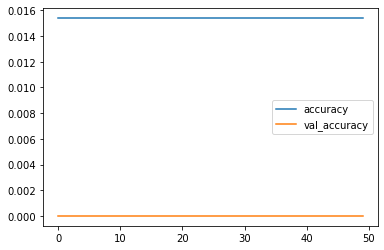

In [136]:
# Create Dataframe

history_df = pd.DataFrame(history.history)

# Plot between Accuracy and val_accuracy

history_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

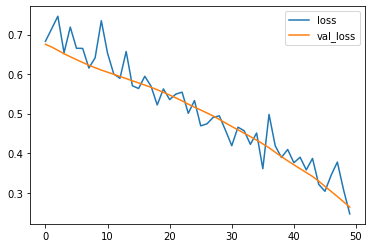

In [137]:
# Plot between loss and val_loss

history_df[['loss', 'val_loss']].plot()

In [88]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report  

y_pred = model.predict(X_test)
y_pred= np.where(y_pred >= 0.5, 1, 0)
y_pred

print(classification_report(y_test, y_pred))

1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       4.0
           6       0.00      0.00      0.00       3.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       2.0

    accuracy                           0.00      14.0
   macro avg       0.00      0.00      0.00      14.0
weighted avg       0.00      0.00      0.00      14.0



## Model Inference

In [138]:
# Preprocessing inference

df_inf1['headlineCleaned'] = df_inf1['headline'].apply(lambda x: clean_rev(x))

In [139]:
df_inf1

,content_id,category,headline,authors,link,short_description,date,Length_headline,Length_authors,Length_link,Length_short_description,short_descriptionCleaned,headlineCleaned
0,38,COMEDY,Trump's New 'MAGA'-Themed Swimwear Sinks On Tw...,Ed Mazza,https://www.huffingtonpost.com/entry/trump-mag...,"""Does this swimsuit make me look racist?""",2018-05-25,51,8,85,41,swimsuit make look racist,trump new magathemed swimwear sink twitter
1,27,WORLD NEWS,Irish Voters Set To Liberalize Abortion Laws I...,,https://www.huffingtonpost.com/entry/ireland-a...,Vote counting will begin Saturday.,2018-05-25,76,0,96,34,vote count begin saturday,irish voters set liberalize abortion laws land...
2,79,COMEDY,'Late Night' Writer's Breathless Royal Wedding...,Lee Moran,https://www.huffingtonpost.com/entry/royal-wed...,"“Then he bites his lip, like, ‘Hmm, girl.’”",2018-05-24,77,9,114,43,bite lip like hmm girl,late night writers breathless royal wed recap ...
3,95,POLITICS,Ireland's Historic Vote On Legalizing Abortion...,Laura Bassett,https://www.huffingtonpost.com/entry/irelands-...,American influence could tip the referendum.,2018-05-24,77,13,117,44,american influence could tip referendum,irelands historic vote legalize abortion haunt...
4,50,ENTERTAINMENT,Pete Davidson Says His Mental Illness Doesn't ...,Ron Dicker,https://www.huffingtonpost.com/entry/pete-davi...,"The ""SNL"" star reacted to criticism that he sh...",2018-05-25,58,10,100,120,snl star react criticism not date ariana grand...,pete davidson say mental illness not ruin romance
5,16,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26,67,14,97,75,not count robert mueller nail nsa whistleblowe...,edward snowden one trump love vladimir putin
6,94,POLITICS,Immigrant Children Accuse Border Patrol Of Abu...,Willa Frej,https://www.huffingtonpost.com/entry/immigrant...,One 16-year-old filed a complaint alleging tha...,2018-05-24,74,10,103,138,one file complaint allege border patrol agent ...,immigrant children accuse border patrol abuse ...
7,72,QUEER VOICES,How 'RuPaul’s Drag Race' Is Teaching Straight ...,"INTO, Editorial Partner",https://www.huffingtonpost.com/entry/how-rupau...,Mainstream pop culture isn’t the only thing to...,2018-05-25,72,23,114,104,mainstream pop culture not thing potentially b...,rupauls drag race teach straight people queer ...
8,87,COMEDY,Seth Meyers Gives Donald Trump Some Valuable M...,Lee Moran,https://www.huffingtonpost.com/entry/seth-meye...,"“Stop trying to make ‘Fetch’ happen.""",2018-05-24,61,9,104,37,stop try make fetch happen,seth meyers give donald trump valuable market ...
9,23,WEIRD NEWS,Mystery 'Wolf-Like' Animal Reportedly Shot In ...,Hilary Hanson,https://www.huffingtonpost.com/entry/montana-w...,“We have no idea what this was until we get a ...,2018-05-26,81,13,97,63,idea get dna report back,mystery wolflike animal reportedly shoot monta...


In [140]:

# Predict 

y_pred = model.predict(df_inf1.headlineCleaned)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred

1/1 [==============================] - 1s 1s/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [141]:
# Transform back to the original category
y_pred1= le.inverse_transform(y_pred)

In [142]:
y_pred1

array(['BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS',
       'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS', 'BUSINESS'],
      dtype=object)

In [143]:
#rubah ke data frame
y_pred1 = pd.DataFrame(y_pred1, columns=['prediksi'])
y_pred1

,prediksi
0,BUSINESS
1,BUSINESS
2,BUSINESS
3,BUSINESS
4,BUSINESS
5,BUSINESS
6,BUSINESS
7,BUSINESS
8,BUSINESS
9,BUSINESS


In [144]:
#cek data inference original
df_inf1['category']

0           COMEDY
1       WORLD NEWS
2           COMEDY
3         POLITICS
4    ENTERTAINMENT
5         POLITICS
6         POLITICS
7     QUEER VOICES
8           COMEDY
9       WEIRD NEWS
Name: category, dtype: object

In [145]:
#Buat dataframe prediction
predictions = pd.concat([df_inf1['category'], y_pred1], axis=1)
predictions.columns = ['Actual','predik']
predictions

,Actual,predik
0,COMEDY,BUSINESS
1,WORLD NEWS,BUSINESS
2,COMEDY,BUSINESS
3,POLITICS,BUSINESS
4,ENTERTAINMENT,BUSINESS
5,POLITICS,BUSINESS
6,POLITICS,BUSINESS
7,QUEER VOICES,BUSINESS
8,COMEDY,BUSINESS
9,WEIRD NEWS,BUSINESS
